# Machine Learning with Scikit-Learn

Scikit-Learn is a machine learning Python library which provides a large amount of machine learning algorithms. All machine learning models are implemented as Python classes. It makes easy to train models and switch between different algorithms. 

Before fitting a model with sckit-learn, our data has to be in a recognizable format. Sckit-Learn works well with NumPy arrays.There we will convert Pandas DataFrames to NumPy arrays.

Sckit-Learn expects Features matrix and Target vector. In 2D Features matrix, rows represent samples and columns represent features. Target vector is usually 1D vector and represent labels. 

First we need to import sckit-learn library to start working with it. Then we will import the boston dataset which comes with the scikit-learn library. 

In [1]:
#!pip install -U scikit-learn

import sklearn
from sklearn.datasets import load_boston

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston() # load boston house price dataset
df = pd.DataFrame(data.data, columns=data.feature_names) # convert dataset to Pandas DataFrame
df['target'] = data.target # arrange target vector
df.head() # look at the first 5 observations of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, we will arrange the features matrix. We will take all columns except target column.

In [3]:
features = df.loc[:, df.columns[0:-1]].values  # Converting to NumPy array with values attribute
features.shape  # confirm it is 2D array

(506, 13)

In [4]:
targets = df.loc[:, 'target'].values  # Convert prices/target column to NumPy array
targets.shape  # it is 1D in this case

(506,)

Now, our data is ready to work with sckit-learn library. 

### Linear Regression using Scikit-Learn

   Linear regression is used to predict a continuous value. Let's create a linear regression model for the boston house prices dataset using sckit-learn. First, we will import the necessary libraries:

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Then we will split our dataset into two pieces: training set and test set. The ratio can be 80% for training and %20 for test. 

In [6]:
features_train, features_test, targets_train, targets_test \
= train_test_split(features,targets,random_state = 3)

In [7]:
reg = LinearRegression(fit_intercept=True)  # create a LinearRegression instance

reg.fit(features_train,targets_train)  # train the model on the training set

score = reg.score(features_test, targets_test)  # print the score acc. to test set
print(score)

0.7668895327325096


### Logistic Regression using Scikit-Learn

Logistic regression is a model used for classification. Let's create Logistic regression model for the iris dataset. 

In [8]:
from sklearn.datasets import load_iris  
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler

In [9]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

iris_ftr = iris_df.loc[:, iris_df.columns[0:-1]].values  # take all columns except species(target)
iris_tar = iris_df.loc[:, iris_df.columns[-1]].values  # take only last(target) column

iris_ftr_train, iris_ftr_test, iris_tar_train, iris_tar_test \
= train_test_split(iris_ftr,iris_tar, random_state = 0)

Logistic regression is affected by scale, therefore, we need to scale our features in the data onto unit scale before using Logistic regression for optimal performance. Unit scale means having Gaussian with zero mean (mean=0) and unit variance (variance=1). We will use scikit-learn's _**StandardScaler**_ to standardize the features.   

In [10]:
scaler = StandardScaler()
scaler.fit(iris_ftr_train)  # fit on training set only

iris_ftr_train = scaler.transform(iris_ftr_train) # apply transform to the training set
iris_ftr_test = scaler.transform(iris_ftr_test) # apply transform to the test set

In [11]:
clf = LogisticRegression()

clf.fit(iris_ftr_train, iris_tar_train)  # train the model

acc = clf.score(iris_ftr_test, iris_tar_test)  # print the accuracy acc. to test set: correct predictions/total number of data points
print(acc)

0.9736842105263158


Logistic regression allows us to see prediction probabilities as well as a prediction. So, it gives us probabilities. 

In [12]:
iris_ftr_test[0].reshape(1,-1)  # features of one observation after standardization

array([[-0.09984503, -0.57982483,  0.72717965,  1.51271377]])

In [13]:
print('prediction:', clf.predict(iris_ftr_test[0].reshape(1,-1))[0])  # predictions for one sample
print('probabilities:',clf.predict_proba(iris_ftr_test[0].reshape(1,-1)))  # probabilities of the prediction

prediction: 2
probabilities: [[1.44000190e-04 3.10229631e-02 9.68833037e-01]]


We can see the prediction and probabilities for that prediction using the line above. We have three classes: 0, 1 and 2. The class of first observation in the test set is 2 and our model predicts 2 with 96.8% probability.  

We can also look at the confusion matrix. It gives much insight into what was wrong. 

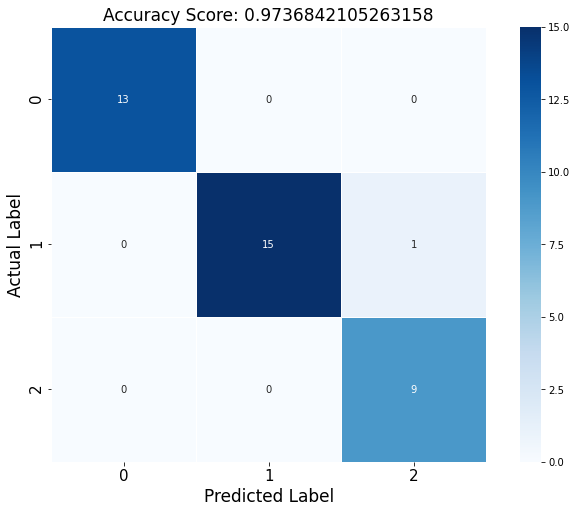

In [14]:
from sklearn import metrics
import seaborn as sns

cfsmat = metrics.confusion_matrix(iris_tar_test, clf.predict(iris_ftr_test))

plt.figure(figsize=(12,8))
sns.heatmap(cfsmat, annot=True,
           fmt='.0f',
           linewidths = .5,
           square = True,
           cmap = 'Blues');

plt.ylabel('Actual Label', fontsize=17);
plt.xlabel('Predicted Label', fontsize=17);
plt.title('Accuracy Score: {}'.format(acc), size=17);
plt.tick_params(labelsize=15)

We have 38 samples with corresponding labels in our test set. According to heat map, we can see that predicted labels and actual labels are mostly matched, we have only 1 missclassification. 